In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [116]:
# import the dataset
df = pd.read_csv('sales.csv')

In [117]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
375182,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680,France
375183,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680,France
375184,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,France
375185,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,France


In [118]:
df['Country'].value_counts()

Country
United Kingdom          335523
Germany                   8185
France                    7636
EIRE                      6544
Spain                     2232
Netherlands               2218
Belgium                   1770
Switzerland               1709
Portugal                  1376
Australia                 1137
Norway                     962
Italy                      667
Channel Islands            651
Finland                    607
Cyprus                     544
Sweden                     423
Austria                    363
Denmark                    357
Japan                      315
Poland                     284
Israel                     230
Unspecified                224
Singapore                  206
Iceland                    176
USA                        175
Canada                     139
Greece                     131
Malta                       95
United Arab Emirates        63
European Community          51
RSA                         48
Lithuania                   35


In [119]:
df = df[df['Country'] == 'United Kingdom']

In [120]:
# Feature Engineering
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')

In [121]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
375167,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804,United Kingdom,11.40
375168,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.40
375169,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60
375170,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.00


In [123]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [124]:
df.duplicated().sum()

4951

In [125]:
df.shape

(335523, 9)

In [126]:
335523 - 4951

330572

In [165]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
375167,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804,United Kingdom,11.40
375168,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.40
375169,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60
375170,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.00


#### Salees trend analysis

In [128]:
df.shape

(335523, 9)

In [167]:
df['InvoiceDate'].dt.month_name()

0         December
1         December
2         December
3         December
4         December
            ...   
375167    December
375168    December
375169    December
375170    December
375171    December
Name: InvoiceDate, Length: 335523, dtype: object

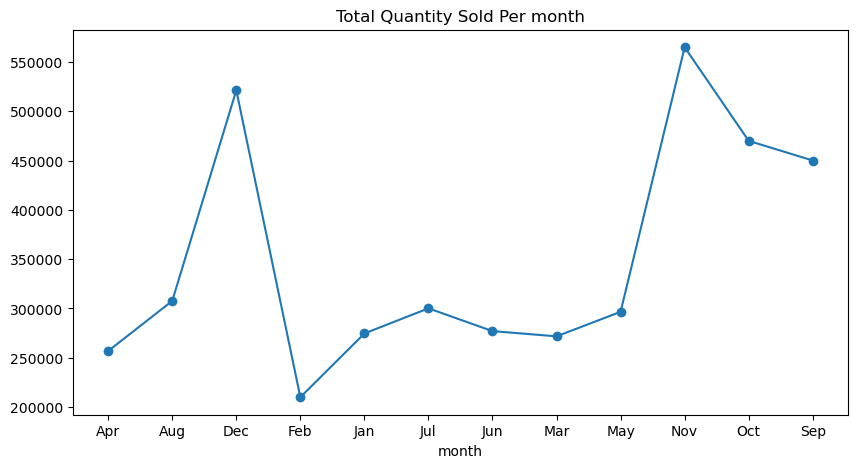

In [207]:
df['month'] = df['InvoiceDate'].dt.strftime('%b')
df_resampled =df.groupby('month')['Quantity'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_resampled['month'], df_resampled['Quantity'], marker='o')

# Step 3: Add labels and title
plt.title('Total Quantity Sold Per month')
plt.xlabel('month')
plt.show()


#### Linear Regression

In [226]:
import statsmodels.api as sm
# First invoice date

first_invoice_date  = df['InvoiceDate'].min()
df['DaysSinceFirstInvoice'] = (df['InvoiceDate'] - first_invoice_date).dt.days
df[df['DaysSinceFirstInvoice']!= 0].shape

(333821, 13)

In [228]:
df.shape

(335523, 13)